<a href="https://colab.research.google.com/github/Aishwarya-RaviK/Regression_Project-Medical-Insurance-/blob/main/Health_Insurance_Premium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Health Insurance Premium Prediction**

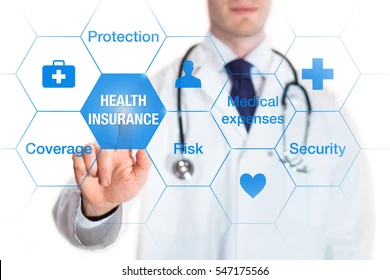

Health insurance or medical insurance is a type of insurance that covers the whole or a part of the risk of a person incurring medical expenses.

**Importing neccessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the data in dataframe**

In [ ]:
df=pd.read_csv("/content/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Description about data**

Column -1 -----> Gives the age of the person

Column -2 -----> Gives the gender of the person


Column -3 -----> Gives the bmi of the person 

Column -4 -----> Number of children 

Column -5 -----> Indicates if the person is smoker or not

Column -6 -----> Region of living

Column -7 -----> Insurance Premium (Target varibale)

### **Data Cleaning**

In [ ]:
print(df.shape)
df.info()

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


By looking at the info of the data there are no null values, and dtype is also correct for each feature and target.But droping duplicates and checking for outliers must be done.

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

1.Age

In [ ]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
q1=np.quantile(df['age'],q=0.25)
q3=np.quantile(df['age'],q=0.75)
iqr=q3-q1
minimum=q1-1.5*iqr 
maximum=q3+1.5*iqr
print(minimum,maximum)

-9.0 87.0


You can buy health insurance even if you are above 65 years of age if there is no age limit at the time of entry in the policy.

2.Sex

In [ ]:
df['sex'].unique() ## Categorical variable must be encoded

array(['female', 'male'], dtype=object)

3.BMI (Body Mass Index)

In [ ]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [ ]:
q1=np.quantile(df['bmi'],q=0.25)
q3=np.quantile(df['bmi'],q=0.75)
iqr=q3-q1
minimum=q1-1.5*iqr 
maximum=q3+1.5*iqr
print(minimum,maximum)

13.7 47.290000000000006


BMI	Weight          Status

Below 18.5	      Underweight


18.5—24.9	        Healthy Weight

25.0—29.9	        Overweight

30.0 and Above	  Obese

Values above 30 is anyways obese so we clip it to the maximum value to avoid these outliers

In [ ]:
df['bmi']=df['bmi'].clip(minimum,maximum)

4.Children

In [ ]:
df['children'].unique()  

array([0, 1, 3, 2, 5, 4])

5.Smoker

In [ ]:
df['smoker'].unique() #must be encoded

array(['yes', 'no'], dtype=object)

6.Region

In [ ]:
df['region'].unique()  # must be encoded

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

7.Insurance Premium

In [ ]:
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## **Exploratory Data Analysis**

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

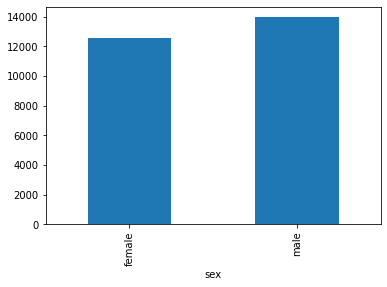

In [ ]:
df.groupby(['sex'])['charges'].mean().plot(kind='bar')

On an average men pay higher premium than female.

Studies have shown that the proportion of deaths and disability from heart disease was significantly higher in men than in women. This explains why health insurance premiums are higher for men than they are for women.

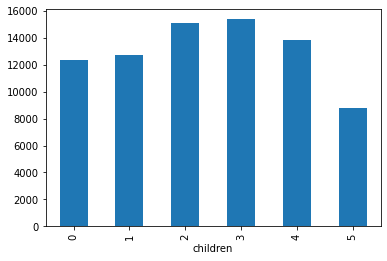

In [ ]:
df.groupby(['children'])['charges'].mean().plot(kind='bar')

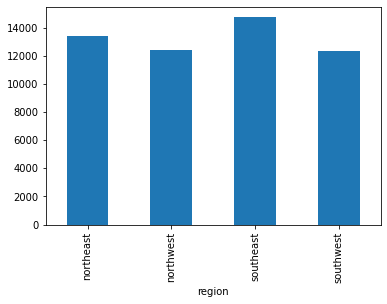

In [ ]:
df.groupby(['region'])['charges'].mean().plot(kind='bar')

SouthEast -----> Alabama, Florida, Georgia, Kentucky, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia and West Virginia

NorthEast -----> Connecticut, Delaware, District of Columbia, Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, pennsylvania, puerto Rico, Rhode Island, Vermont

NorthWest -----> Oregon, Washington, Idaho, Montana and Wyoming 

SouthWest -----> Arizona · New Mexico Others, depending on boundaries used: California · Colorado · Nevada · Utah · Oklahoma

Our location has a direct impact on your health insurance premium. That’s because the hospitalization expenses in smaller cities are lesser as compared to metro and other major cities.

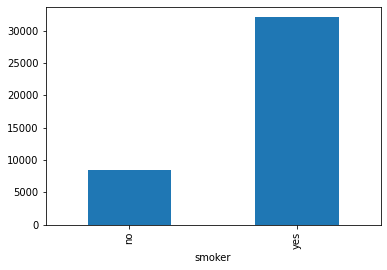

In [ ]:
df.groupby(['smoker'])['charges'].mean().plot(kind='bar')

A person who smokes has high possibility of getting serious health issues, so smokers have to pay more premium

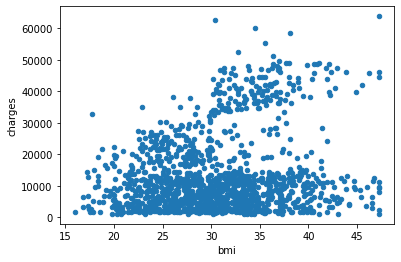

In [ ]:
df.plot(x='bmi',y='charges',kind='scatter')
plt.show()

In [ ]:
df['bmi'].corr(df['charges']) # approx 0.2 very feable relation ?????

0.1989970659441764

 A higher BMI means that the individual is at a higher risk of heart diseases and might frequently visit the hospitals due to weight-related issues, very much inline with our knowledge.

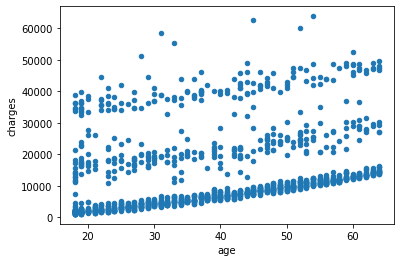

0.29900819333064754

In [ ]:
df.plot(x='age',y='charges',kind='scatter')
plt.show()
df['age'].corr(df['charges']) 

As the age increases the health insurance premium also increases.This is very much inline with our knowledge.

## **Encoding Data**

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df['sex']=[0 if x== 'male' else 1 for x in df['sex']]
df['sex'].unique()

array([1, 0])

In [ ]:
df['smoker']=[0 if x=='no' else 1 for x in df['smoker']]
df['smoker'].unique()

array([1, 0])

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
enc=OneHotEncoder() 
enc_data=pd.DataFrame(enc.fit_transform(df[['region']]).toarray())

In [ ]:
New_df=df.join(enc_data)
New_df.columns   # 3-> Southwest 2-> Southeast 1->northwest 0-> northeast

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 0, 1, 2,
       3],
      dtype='object')

In [ ]:
New_df=New_df.rename(columns={0:'NorthEast',1:'NorthWest',2:'SouthEast',3:'SouthWest'})

In [ ]:
New_df.drop('region',axis=1,inplace=True)

In [ ]:
New_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'NorthEast',
       'NorthWest', 'SouthEast', 'SouthWest'],
      dtype='object')

# **Splitting Data**

In [ ]:
X=New_df[['age', 'sex', 'bmi', 'children', 'smoker','NorthEast','NorthWest', 'SouthEast', 'SouthWest']]
y=New_df['charges']

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

# **Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler 
scale =StandardScaler() 
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression 
regg=LinearRegression()
regg.fit(X_train,y_train)
y_pred=regg.predict(X_test)

In [ ]:
from sklearn import metrics
a=metrics.r2_score(y_test,y_pred)
print(a)

0.7641771240760509


# **K Nearest neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [ ]:
from sklearn import metrics
a=metrics.r2_score(y_test,y_pred)
print(a)

0.8231177426161005


# **Support Vector Machine**

In [ ]:
from sklearn import svm 
sup=svm.SVR(kernel='rbf',gamma='scale')
sup.fit(X_train,y_train)
y_pred=sup.predict(X_test)

In [ ]:
from sklearn import metrics
a=metrics.r2_score(y_test,y_pred)
print(a)

-0.0988555603389587


# **Descision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [ ]:
from sklearn import metrics
a=metrics.r2_score(y_test,y_pred)
print(a)

0.7505431044838379


# **Conclusion**

The problem was to predict the health insurance premium for the people in The United States of America and since this was a regression problem, we trained the machine with the following algorithms.
1. Linear Regression

2. K Nearest Neighbors

3. Support Vector Machine

4. Decision Tree

Based on the evaluation metrics.

**Linear Regression**       - 0.764

**K Nearest Neighbors**     - 0.823

**Support Vector Machine**  - -0.098

**Decision Tree**           - 0.75

K Nearest Neighbors is the better model to predict the medical inusrance premium.